In [2]:
%matplotlib inline
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
 # load dataset
fashion_mnist = keras.datasets.fashion_mnist 

#  tetsing and training set
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images[0,23,23]

194

In [12]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

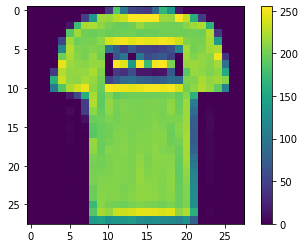

In [14]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
# swish all value to 0-255 to 0 and 1
train_images = train_images / 255.0

test_images = test_images / 255.0

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
 # we train the model
model.fit(train_images, train_labels, epochs=10) 

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5011 - accuracy: 0.8227
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3768 - accuracy: 0.8644
Epoch 3/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3378 - accuracy: 0.8769
Epoch 4/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3151 - accuracy: 0.8850
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2971 - accuracy: 0.8900
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2821 - accuracy: 0.8960
Epoch 7/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2688 - accuracy: 0.9003
Epoch 8/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2575 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2469 - accuracy: 0.9091
Epoch 10/10
60

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.3386 - accuracy: 0.8812
Test accuracy: 0.8812


In [20]:
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([1.9926912e-08, 2.9553870e-09, 2.4071220e-08, 6.1060368e-10,
       3.4057081e-08, 2.4275547e-02, 3.9640433e-08, 3.6892123e-03,
       4.5886456e-08, 9.7203505e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

Pullover


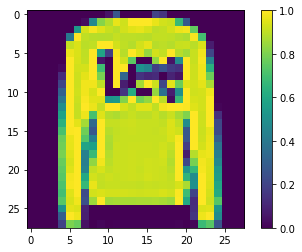

In [27]:
print(class_names[np.argmax(predictions[1])])
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 12
------------------------------
***** Excpected:  Sneaker *****
***** Guess:  Sandal *****
------------------------------


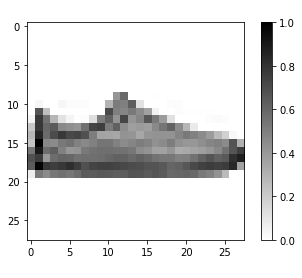

In [35]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  print('-'*30)
  print('*'*5,"Excpected: ",label,'*'*5)
  print('*'*5,"Guess: ",guess,'*'*5)
  print('-'*30)
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
